In [23]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [24]:
dataframe = pd.read_csv("csv/82000278_Toamnei_CO2_2021_7.csv")
dataframe

,time,latitude,longitude,altitude,co2
0,1625086823,45.651464,25.615426,100,553
1,1625086883,45.651464,25.615426,100,551
2,1625086943,45.651464,25.615426,100,551
3,1625087003,45.651464,25.615426,100,558
4,1625087063,45.651464,25.615426,100,559
...,...,...,...,...,...
44607,1627764931,45.651464,25.615426,538,626
44608,1627764991,45.651464,25.615426,538,633
44609,1627765051,45.651464,25.615426,538,628
44610,1627765111,45.651464,25.615426,538,627


In [25]:
X = dataframe[["time"]].values
Y = dataframe[["co2"]].values

In [26]:
i=0
x=[]
y=[]
for el in X:
    x.append(i)
    y.append(Y[i][0])
    i=i+1


In [27]:
#{'bootstrap': True, 'max_depth': 25, 'max_features': 'auto', 'min_samples_leaf': 7, 'min_samples_split': 4, 'n_estimators': 1500} 
from sklearn.ensemble import RandomForestRegressor
clf_gs = RandomForestRegressor(bootstrap=True, max_depth=25, max_features='auto', min_samples_leaf=7, min_samples_split=4, n_estimators=1500).fit(X, y)
y_pred_gs = clf_gs.predict(X)

In [28]:
# {'n_estimators': 1400, 'min_samples_split': 6, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 20, 'bootstrap': True}
from sklearn.ensemble import RandomForestRegressor
clf_rs = RandomForestRegressor(bootstrap=True, max_depth=20, max_features='auto', min_samples_leaf=4, min_samples_split=6, n_estimators=1400).fit(X, y)
y_pred_rs = clf_rs.predict(X)

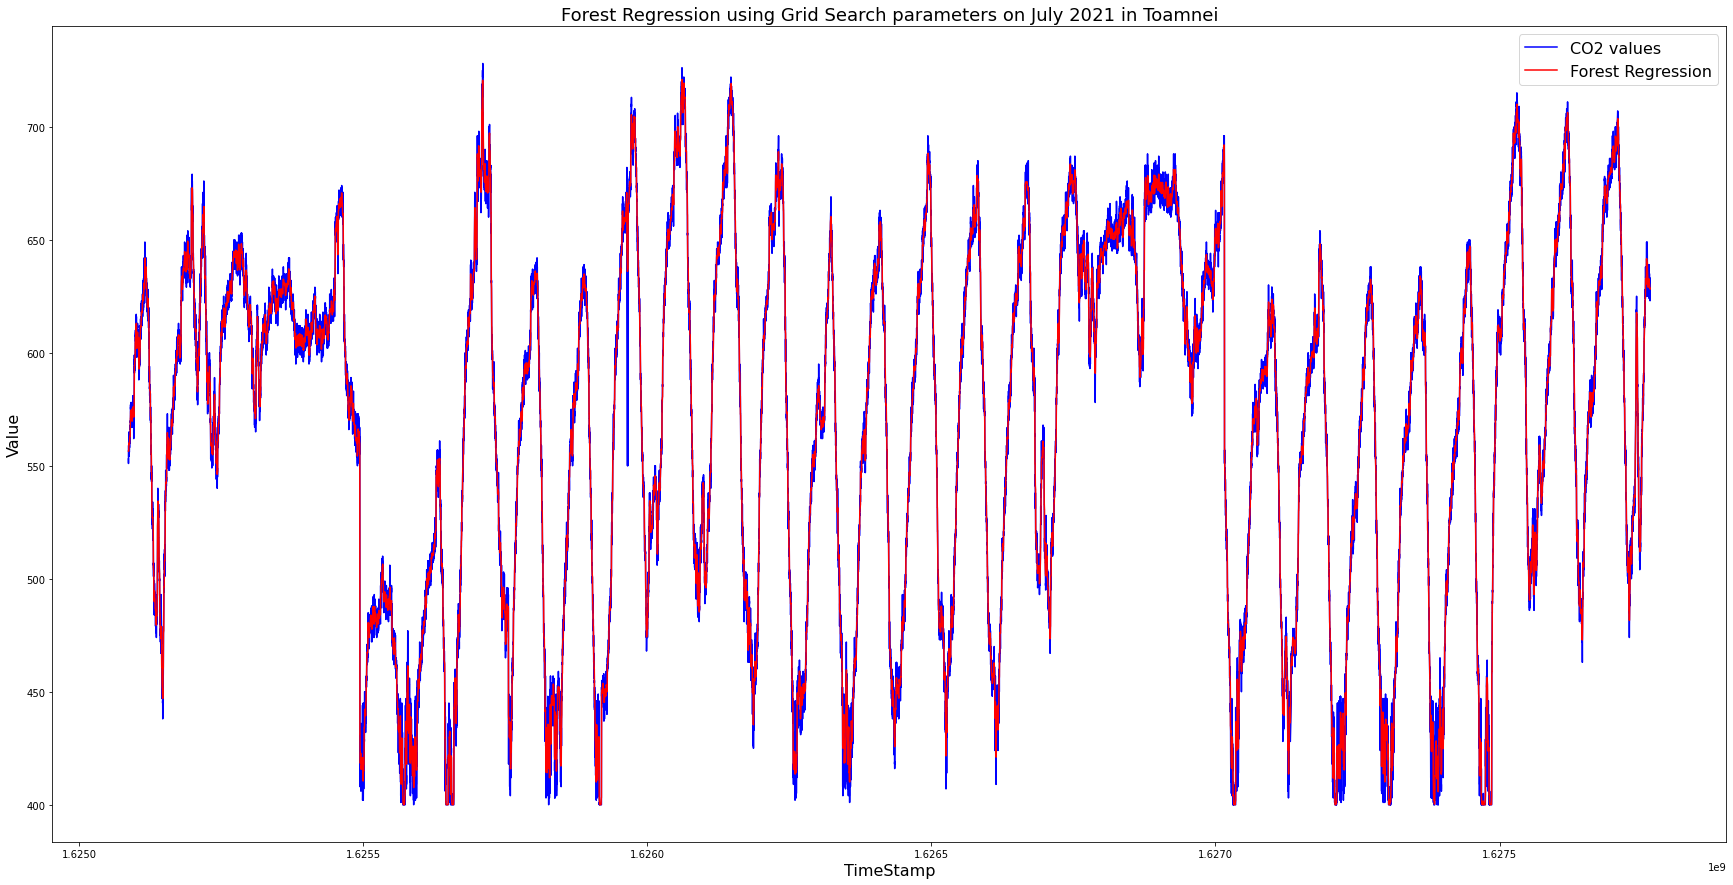

In [29]:
plt.figure(figsize=(30,15))
plt.plot(X, y, color = 'blue', label="CO2 values")
plt.plot(X, y_pred_gs, color = 'red', label = 'Forest Regression')
# plt.scatter(X, y, color = "green")
# plt.scatter(X, y_pred, color = "black")
plt.title('Forest Regression using Grid Search parameters on July 2021 in Toamnei', fontsize=18)
plt.xlabel('TimeStamp', fontsize=16)
plt.ylabel('Value', fontsize=16)
plt.legend(fontsize=16)
plt.savefig('plots_from_csv/CO2_Toamnei_2021-07_Forest-GridSearch_1month.jpg', bbox_inches = 'tight')
plt.show()

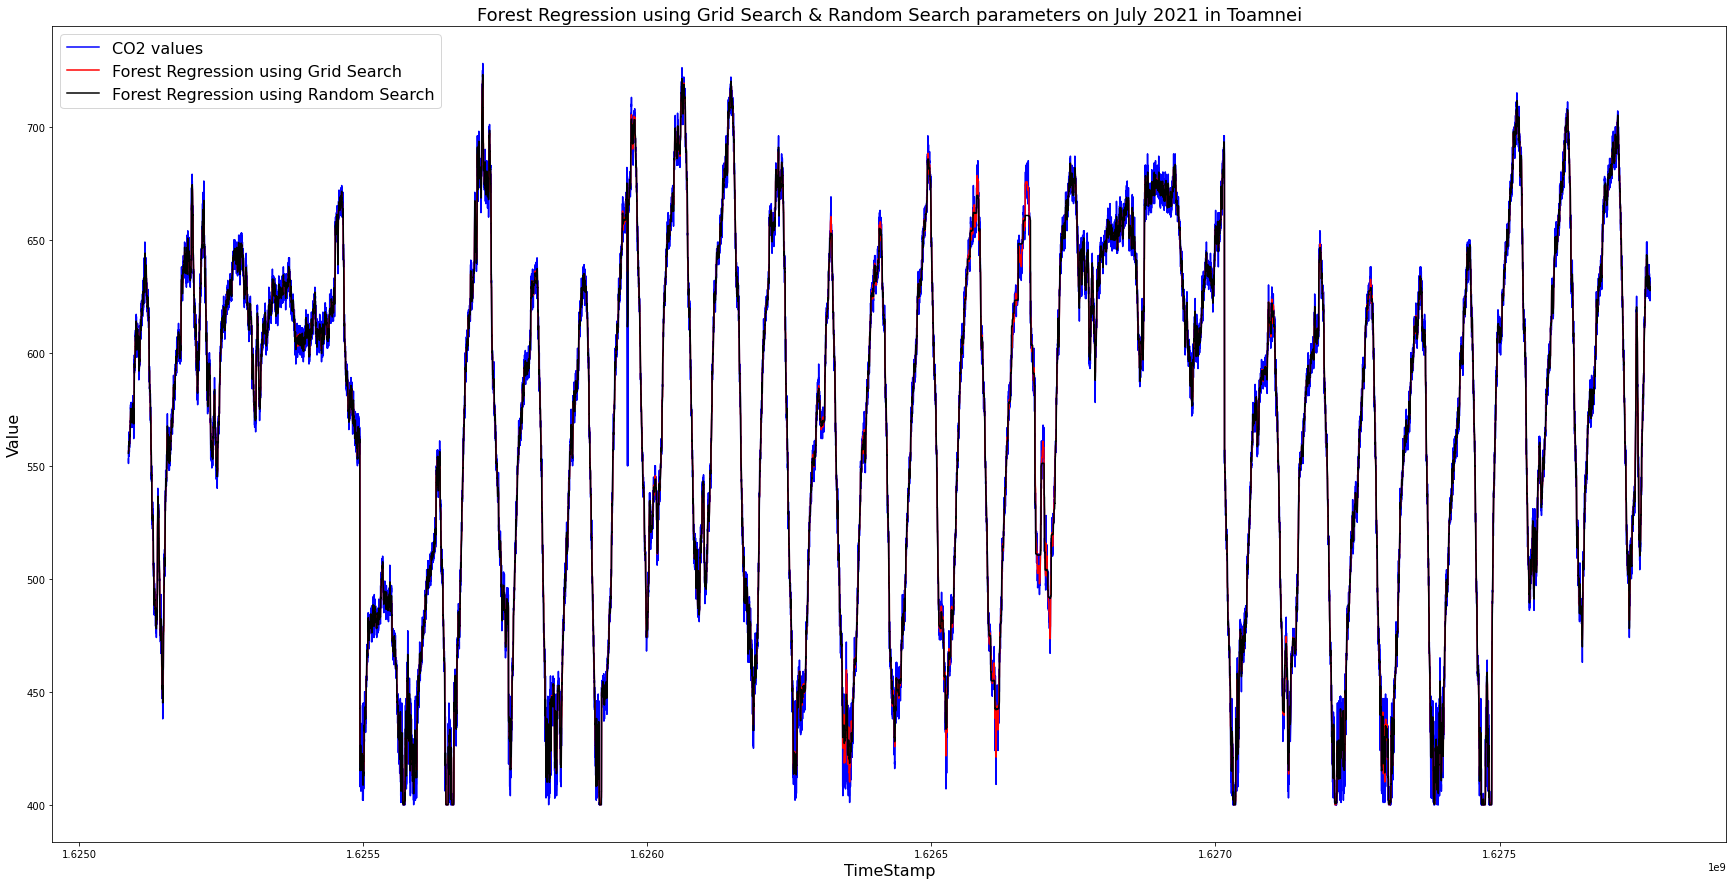

In [30]:
plt.figure(figsize=(30,15))
plt.plot(X, y, color = 'blue', label="CO2 values")
plt.plot(X, y_pred_gs, color = 'red', label = 'Forest Regression using Grid Search')
plt.plot(X, y_pred_rs, color = 'black', label = 'Forest Regression using Random Search')
# plt.scatter(X, y, color = "green")
# plt.scatter(X, y_pred, color = "black")
plt.title('Forest Regression using Grid Search & Random Search parameters on July 2021 in Toamnei', fontsize=18)
plt.xlabel('TimeStamp', fontsize=16)
plt.ylabel('Value', fontsize=16)
plt.legend(fontsize=16)
plt.savefig('plots_from_csv/CO2_Toamnei_2021-07_Forest-GS-RS_1month.jpg', bbox_inches = 'tight')
plt.show()